In [2]:
class Rectangle:
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height
    def __str__(self):
        return f"Rectangle(x={self.x}, y={self.y}, width={self.width}, height={self.height})"
        

rectangle_list = []

x = 477
y = 1007
width = 1001 - x
height = 1078 - y

for i in range(3,4):
    rec = Rectangle(x,y + (height * i), width, height)
    rectangle_list.append(rec)

x = 1012
for i in range(3):
    rec = Rectangle(x,y + (height * i), width, height)
    rectangle_list.append(rec)

In [3]:
print(len(rectangle_list))

4


In [4]:
veriification_rectangle = Rectangle(467, 83, 657 - 467, 145 - 83)

In [5]:
import pyautogui
import os
import time

def timer(seconds):
    # Start a 5-second timer
    for i in range(seconds, 0, -1):
        print(f"Remaining: {i} seconds")
        time.sleep(1)

def screenshot(id):
    # Specify the directory where you want to save the screenshot
    directory = r"C:\Users\Eduardo\Pictures\Screenshots\persona3ChiYou"

    # Ensure the directory exists
    os.makedirs(directory, exist_ok=True)

    # Capture the screenshot
    screenshot = pyautogui.screenshot()

    # Save the screenshot to the specified directory
    screenshot.save(os.path.join(directory, f"{id}.png"))

import pydirectinput
import time

def changeTelos():
    # Press the 'l' key
    pydirectinput.press('l')
    


    # Press the 'm' key
    pydirectinput.press('m')
    

def timed_input(seconds, key):
    pydirectinput.press(key)
    time.sleep(seconds)

def change3wayFusion():
    for i in range(3):
        # Press the 'l' key
        timed_input(0.01, 'l')

    timed_input(0.01, 'm')
    
    for i in range(2):
        # Press the 'l' key
        timed_input(0.01, 'w')
        
    
    timed_input(0.01, 'm')

    for i in range(1):
        # Press the 'l' key
        timed_input(0.01, 'w')
        
    # Press the 'm' key
    pydirectinput.keyDown('f4')
    pydirectinput.keyUp('f4')
    timed_input(0.01, 'm')
    pydirectinput.keyDown('f4')
    pydirectinput.keyUp('f4')

In [6]:
# open 'skills.csv'
import pandas as pd


file_path = "C:\\Users\\Eduardo\\Documents\\Projects\\AutoTelos\\Persona3FES-FusionHelper\\skills\\skills.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Create a list of all the skills in the CSV file
list_skill_csv = df['skill'].tolist()

print(list_skill_csv)

list_skill_csv = ['Wind Amp', 'Sukukaja', 'Null Dark', 'Mighty Swing', 'Patra', 'Recarm', 'Unshaken Will', 'Tetrakarn', 'Growth 3', 'Megidolaon', 'Spell Master', 'Samsara', 'Tarukaja', 'Mind Charge', 'Akasha Arts', 'Marakunda', 'Diarahan']

['Cleave', 'Power Slash', 'Getsu-ei', 'Zan-ei', 'Gale Slash', 'Mighty Swing', 'Fatal End', 'Blade of Fury', 'Deathbound', "Heaven's Blade", 'Tempest Slash', 'Brave Blade', 'Scarlet Havoc', 'Vorpal Blade', 'Bash', 'Assault Dive', 'Sonic Punch', 'Swift Strike', 'Kill Rush', 'Herculean Strike', 'Gigantic Fist', 'Heat Wave', 'Vicious Strike', 'Akasha Arts', "God's Hand", 'Shadow Hound', 'Weary Thrust', 'Single Shot', 'Double Fangs', 'Holy Arrow', 'Twin Shot', 'Cruel Attack', 'Torrent Shot', 'Vile Assault', 'Poison Arrow', 'Arrow Rain', 'Myriad Arrows', 'Pralaya', 'Primal Force', 'Agi', 'Maragi', 'Agilao', 'Maragion', 'Agidyne', 'Maragidyne', 'Ragnarok', 'Ardhanari', 'Maralagidyne', 'Bufu', 'Mabufu', 'Bufula', 'Mabufula', 'Bufudyne', 'Mabufudyne', 'Niflheim', 'King and I', 'Zio', 'Mazio', 'Zionga', 'Mazionga', 'Ziodyne', 'Maziodyne', 'Thunder Reign', 'Thunder Call', 'Garu', 'Magaru', 'Garula', 'Magarula', 'Garudyne', 'Magarudyne', 'Panta Rhei', 'Hama', 'Mahama', 'Hamaon', 'Mahamaon', 'Samsa

In [7]:
import pyautogui
import numpy as np
import pickle
from PIL import Image
import pytesseract
import re
import difflib


pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  # replace with your actual path

custom_config = r'--tessdata-dir "C:\Program Files\Tesseract-OCR\tessdata" --psm 13'









def get_images(number):

    found_skills = []
    
    for rectangle in rectangle_list:

        # Take a screenshot of the rectangle
        cropped_img = pyautogui.screenshot(region=(rectangle.x, rectangle.y, rectangle.width, rectangle.height))
        

        #cropped_img.show()
        #test
        #cropped_img = img.crop((rectangle.x, rectangle.y, rectangle.x + rectangle.width, rectangle.y + rectangle.height))

         # Convert the image to RGB
        rgb_img = cropped_img.convert('RGB')

        hex_color = '65dfcd'

        # Convert the target hex color to RGB
        target_r, target_g, target_b = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
        target_color = np.array([target_r, target_g, target_b])

        # Convert the image to a NumPy array
        img_array = np.array(rgb_img)

        # Calculate the Euclidean distance between each pixel's color and the target color
        color_distance = np.linalg.norm(img_array - target_color, axis=2)

        # Create a mask for pixels that are similar to the target color
        mask = color_distance < 85

        # Change the color of the pixels based on the mask
        img_array[mask] = [0, 0, 0]  # black
        img_array[~mask] = [255, 255, 255]  # white

        # Convert the NumPy array back to an image
        rgb_img = Image.fromarray(img_array)

        # Convert the image to grayscale
        gray_img = rgb_img.convert('L')

        # Apply a threshold to make it binary
        binary_img = gray_img.point(lambda x: 0 if x<128 else 255, '1')

        text = pytesseract.image_to_string(binary_img, config=custom_config)
        
        # 'remove all characters that are not letters, numbers, ' ' or '-'
        text = re.sub(r'[^a-zA-Z0-9 -]', '', text)

        # remove ' ' and '-' from the beginning and end of the string
        text = text.strip(' -')

        match = difflib.get_close_matches(text, list_skill_csv, n=1, cutoff=0.0)

        if match:
            best_match = match[0]
        else:
            best_match = ''  # No match found
            
    
        found_skills.append(best_match)
    
    return found_skills



In [8]:
import logging

desired_skills = [
    'High Counter',
    'Unshaken Will',
    'Panta Rhei',
    'Wind Boost',
    'Wind Amp',
    'Mind Charge',
    'Spell Master',
    'Salvation',
    ]

desired_skills_set = set(desired_skills)

# Create a logger
logging.basicConfig(filename='predictionsTrumpeter.log', level=logging.INFO)

skills_aquired = []
for i in range(6):
    if i == 2 or i == 3:
        skills_aquired.append(True)
    else:
        skills_aquired.append(False)

dictonary_number_key = { 
    1 : 'f6',
    2 : 'f7',
    3 : 'f8',
    4 : 'f9',
    5 : 'f10',
}

def verify_skills(predictions):
    # Convert both lists to sets
    predictions_set = set(predictions)

    n = len(desired_skills_set & predictions_set)
    if n >= 1:
        #logging.info(f'{n} desired skills found')
        #print(f'{n} desired skills found')
        if not skills_aquired[n]:
            #pydirectinput.keyDown(dictonary_number_key[n])
            #pydirectinput.keyUp(dictonary_number_key[n])
            skills_aquired[n] = True

        if n == 5:
            return True
    return False

Remaining: 3 seconds
Remaining: 2 seconds
Remaining: 1 seconds
Verification rectangle has changed. Stopping the program.


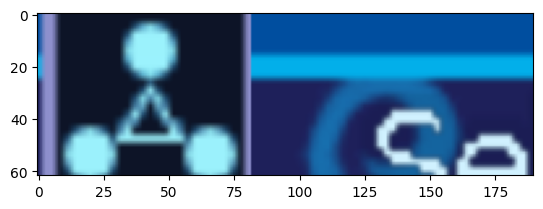

In [10]:
import pygetwindow as gw
import hashlib
import matplotlib.pyplot as plt


def check_window_change(active_window_title):
    # Check if the active window has changed
    if gw.getActiveWindow().title != active_window_title:
        print('Active window has changed. Stopping the program.')
        return True
    return False

verification_hash = None

def define_verification_rectangle():
    verify_image = pyautogui.screenshot(region=(veriification_rectangle.x, veriification_rectangle.y, veriification_rectangle.width, veriification_rectangle.height))
    
    # Convert the image to bytes
    image_bytes = verify_image.tobytes()

    # Create a hash of the image
    image_hash = hashlib.sha256(image_bytes).hexdigest()

    return image_hash


def verify_rectangle():
    verify_image = pyautogui.screenshot(region=(veriification_rectangle.x, veriification_rectangle.y, veriification_rectangle.width, veriification_rectangle.height))
    
    # Convert the image to bytes
    image_bytes = verify_image.tobytes()

    # Create a hash of the image
    image_hash = hashlib.sha256(image_bytes).hexdigest()

    if image_hash != verification_hash:
        print('Verification rectangle has changed. Stopping the program.')
        plt.imshow(verify_image)
        plt.show()
        return True

    return False


''' 
if verify_skills(predictions):
        print('found')
        pydirectinput.keyDown('esc')
        pydirectinput.keyUp('esc')
        print('esc key pressed')
        break
'''

timer(3)
# Press the F4 key
#pydirectinput.keyDown('f4')
#pydirectinput.keyUp('f4')
# Get the title of the currently active window
verification_hash = define_verification_rectangle()
active_window_title = gw.getActiveWindow().title
while True:
    if check_window_change(active_window_title):
        break

    if verify_rectangle():
        break
    predictions = get_images(i)
    # Log the predictions vector
    logging.info(f'{predictions}')
    #print(predictions)
    if check_window_change(active_window_title):
        break
    
    change3wayFusion()
    